<a href="https://colab.research.google.com/github/InesAgudoMartin/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB4_E1_GROUP%5B11%5Dv1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("vehicles_co2.csv", header = 0)

In [4]:
df.head()

,manufacturer,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,fuel_consumption_city_l_per_100km,fuel_consumption_hwy_l_per_100km,fuel_consumption_comb_l_per_100km,fuel_consumption_comb_mpg,co2_emissions_g_per_km
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
print(df.isnull().sum())

manufacturer                         0
model                                0
vehicle_class                        0
engine_size_l                        0
cylinders                            0
transmission                         0
fuel_type                            0
fuel_consumption_city_l_per_100km    0
fuel_consumption_hwy_l_per_100km     0
fuel_consumption_comb_l_per_100km    0
fuel_consumption_comb_mpg            0
co2_emissions_g_per_km               0
dtype: int64


In [6]:
print(df.duplicated().sum())

1103


In [7]:
len(df)

7385

In [8]:
df_clean = df.drop_duplicates()

In [9]:
print(df_clean.duplicated().sum())

0


In [10]:
len(df_clean)

6282

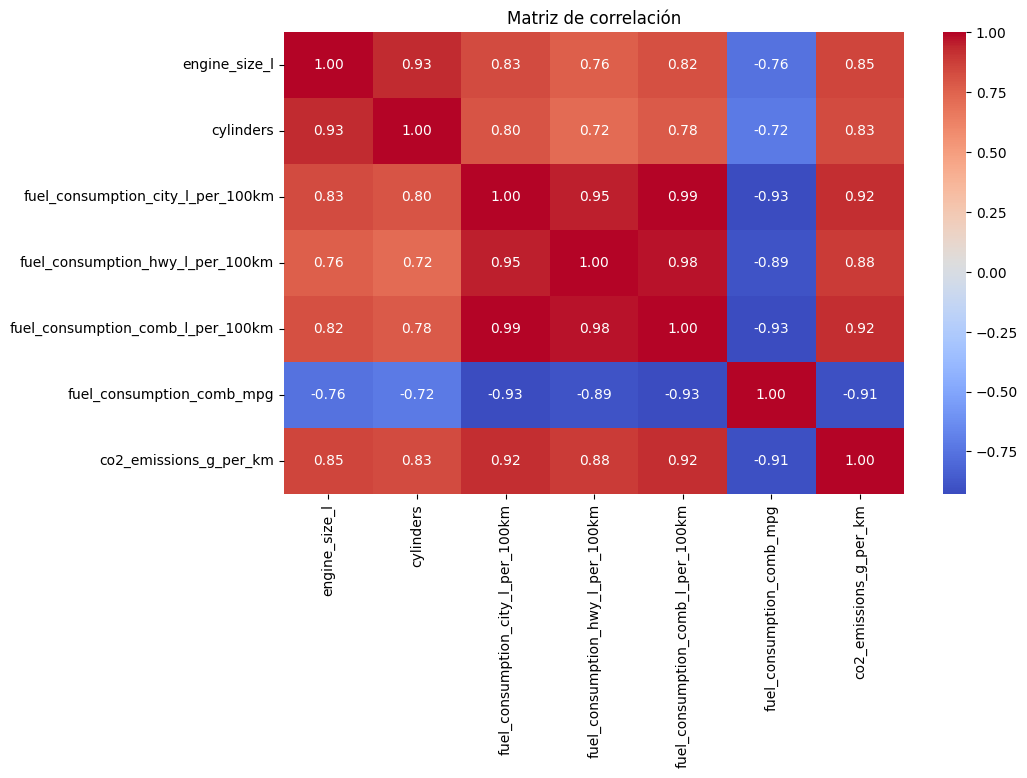

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo variables numéricas
numeric_vars = [
    'engine_size_l', 'cylinders',
    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_l_per_100km',
    'fuel_consumption_comb_mpg',
    'co2_emissions_g_per_km'
]

correlation_matrix = df[numeric_vars].corr()

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


##REGRESIÓN MULTIVARIABLE

In [12]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = [

    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_mpg',
    'engine_size_l',
    'cylinders'

]

# X = variables predictoras, y = variable objetivo
X = df[features]
y = df['co2_emissions_g_per_km']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


MSE: 337.4597605023134
R²: 0.9018906062103024
Coeficientes: [ 0.99164856  5.09294727 -3.4487026   4.9611003   7.49218247]
Intercepto: 229.1722991463202


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = [

    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_comb_mpg',
    'engine_size_l',
    'cylinders'

]

# X = variables predictoras, y = variable objetivo
X = df[features]
y = df['co2_emissions_g_per_km']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 353.5720958067127
R²: 0.8972062804498089
Coeficientes: [ 4.12335754 -3.5604771   5.19154978  6.61841387]
Intercepto: 243.1410439948632


##Clustering particionado

## CLUSTERING JERÁRQUICO

Es una técnica de agrupamiento no supervisado, que no necesita saber de antemano cuántos grupos hay. Consiste en agrupar los elementos (en este caso, coches) según su similitud. Cuanto más parecidos son dos vehículos, más juntos se agrupan.
En esta práctica lo usamos para ver si, según características como motor, consumo o emisiones, los coches se agrupan en perfiles comunes. Esto puede ayudar a entender tipos de vehículos existentes y a diseñar políticas o estrategias de marketing.

### DESARROLLO

Hicimos un clustering jerárquico sobre las variables numéricas del dataset limpio y normalizado. Usamos el método de Ward para agrupar por similitud, y con un corte en 5 grupos detectamos distintos perfiles de vehículos según motor, consumo y emisiones

LIMPIEZA DATOS:

Hemos eliminado los duplicados del CSV y hemos seleccionado solo las variables numéricas relevantes (motor, consumo, emisiones...)

In [ ]:
#cargamos y limpiamos la base de datos
df = pd.read_csv("vehicles_co2.csv").drop_duplicates()

NORMALIZACIÓN:

Hemos escalado las variables con StandardScaler para que todas estén en el mismo rango. Es un paso fundamental ya que una variable con números grandes (como emisiones) dominaría a otras más pequeñas (como cilindros).

In [19]:
# Selección y escalado
features = [
    'engine_size_l', 'cylinders',
    'fuel_consumption_city_l_per_100km',
    'fuel_consumption_hwy_l_per_100km',
    'fuel_consumption_comb_l_per_100km',
    'fuel_consumption_comb_mpg',
    'co2_emissions_g_per_km'
]
df_features = df[features].sample(n=200, random_state=42)  # muestreo para reducir carga

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

## DENDOGRAMA

El dendrograma muestra gráficamente cómo los coches se van agrupando: primero los más parecidos, luego esos grupos se agrupan entre sí, y así sucesivamente.
Cada línea horizontal representa una fusión entre vehículos o grupos de vehículos. Cuanto más alta está la línea, más distintos son los grupos que se fusionan.
El "corte" horizontal que hagas al dendrograma define cuántos grupos (clusters) obtienes.

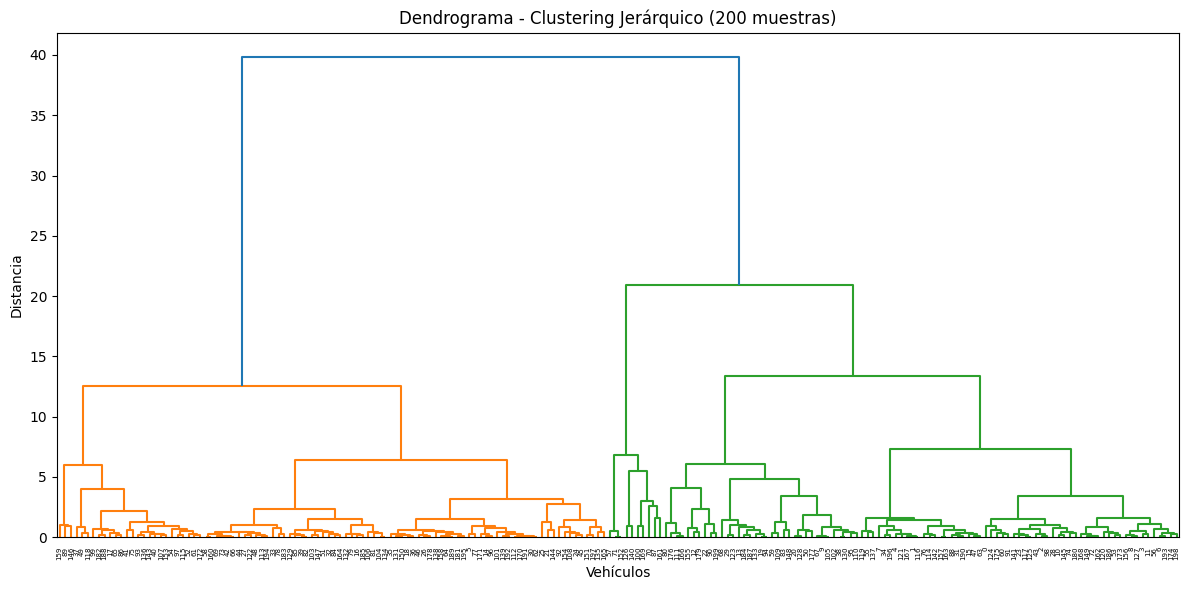

In [20]:
# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico (200 muestras)")
plt.xlabel("Vehículos")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

El dendrograma generado muestra cómo se agrupan jerárquicamente los 200 vehículos según sus características. En la parte baja del gráfico se unen los vehículos más parecidos entre sí, y a medida que se sube, esos grupos pequeños se van juntando formando agrupaciones mayores. Se observan claramente dos grandes bloques bien diferenciados (representados en verde y naranja), lo que sugiere que existen al menos dos tipos principales de vehículos dentro del conjunto analizado. Estos grupos podrían corresponder, por ejemplo, a coches más contaminantes y potentes frente a otros más eficientes. La altura a la que se unen los grupos indica qué tan diferentes son entre sí: cuanto más arriba se juntan, mayor es la diferencia.
